<a href="https://colab.research.google.com/github/shaharHegyi/YOLO_cars_detection/blob/main/street_view_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import torch
from PIL import Image
import json

x = !pip list -v | grep vidgear
if not x: 
  !pip install vidgear
from vidgear.gears import CamGear

!pip install -U PyYAML


In [ ]:
# set model parameters
read_params = {}
read_params['URL'] = 'https://youtu.be/jjlBnrzSGjc'
read_params['quality'] = '360p'
read_params['T0'] = 15
read_params['FPS'] = 30
read_params['T_END'] = 30
read_params['img_path'] = '/../content/images/'
os.makedirs(read_params['img_path'], exist_ok=True)
%cd read_params['img_path']

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)  # load YOLOv5 from torch
model.conf = 0.6    # set model confidence threshold
model.classes = 2   # only detect cars 

In [ ]:
# initialize frame reading
options = {"STREAM_RESOLUTION": read_params['quality']}
stream = CamGear(source=read_params['URL'], stream_mode = True, logging=True,**options).start() # YouTube Video URL as input
input_frame_rate = stream.framerate #[1/s]
count = 0
frame_time = 0
frames = []

# read frames from youtube video
while frame_time < read_params['T_END']:
    # read frames
    frame = stream.read()

    # check if frame is None
    if frame is None:
        #if True break the infinite loop
        break
    
    count += 1  # frame counter
    frame_time = count/input_frame_rate # frame timing [s]

    if (read_params['T0'] < frame_time) and not (count % (60/read_params['FPS'])): # take frames from desired times
      frames.append(frame) 

stream.stop() # safely close video stream.

print('Original Frame Dimensions = ', frames[0].shape)
print('Detecting')
results = model(frames)
print('Done Detecting')
%cd /../content/images/ 
results.save() # save results in images directory

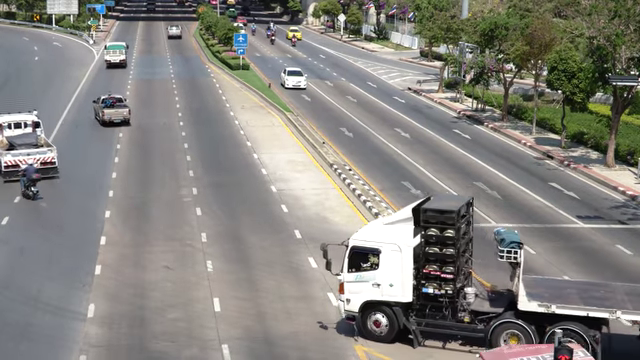

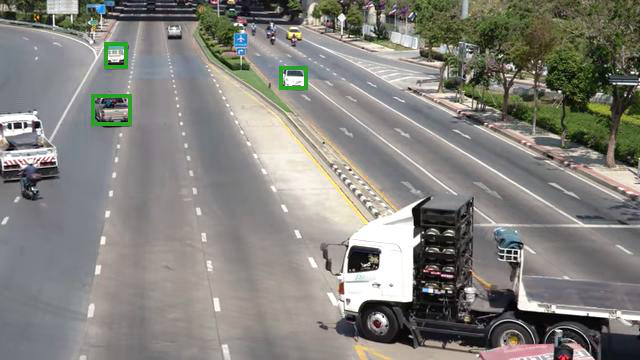

In [ ]:
cv2_imshow(frames[0]) # original
cv2_imshow(plt.imread('results0.jpg')) # result after detection

In [ ]:
def organize_json(results):
  json_dict = {}
  for i,result in enumerate(results.xyxy):
    box = np.around(result[:,:4],3)
    s_obj = ['object {}'.format(i) for i in range(len(box))]
    d_obj = dict(zip(s_obj,box.tolist()))
    s = 'image {}'.format(i)
    json_dict[s] = d_obj
  return json_dict # output {image id: {obj id: bounding box}}

json_dict = organize_json(results) # save results in dictionary
with open('results.txt', 'w') as outfile:
    json.dump(json_dict, outfile)



In [ ]:
x = read_params['FPS']
!ffmpeg -framerate $x -i "results%d.jpg" output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib